<a href="https://colab.research.google.com/github/mir575/Aircraft-Detectio/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [1]:
# Install necessary libraries
!pip install ultralytics roboflow

# Import libraries
from roboflow import Roboflow
from ultralytics import YOLO
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hoFamzwyQnutjLyjEkaO")
project = rf.workspace("mmm-7gi8g").project("aircraft-skin-defects-new-dataset-oooha")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aircraft-skin-defects-new-dataset-1 in yolov8:: 100%|██████████| 5806/5806 [00:00<00:00, 7059.75it/s]


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov9c.pt")  # load a pretrained model (recommended for training)


100%|██████████| 49.4M/49.4M [00:01<00:00, 48.4MB/s]


In [4]:
import os

dataset_path = "/content/aircraft-skin-defects-new-dataset-1"
folders = ["train", "valid", "test"]

for folder in folders:
    folder_path = os.path.join(dataset_path, folder, "images")
    num_images = len(os.listdir(folder_path))
    print(f"{folder}: {num_images} images")


train: 2673 images
valid: 171 images
test: 53 images


In [5]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "/content/aircraft-skin-defects-new-dataset-1"

# Function to move images and labels
def move_files(src_folder, dest_folder, num_files):
    images = os.listdir(os.path.join(dataset_path, src_folder, "images"))
    random.shuffle(images)  # Shuffle for randomness

    selected_images = images[:num_files]  # Select required number of files

    for img in selected_images:
        img_path = os.path.join(dataset_path, src_folder, "images", img)
        label_path = os.path.join(dataset_path, src_folder, "labels", img.replace(".jpg", ".txt"))  # Change extension if needed

        shutil.move(img_path, os.path.join(dataset_path, dest_folder, "images", img))
        shutil.move(label_path, os.path.join(dataset_path, dest_folder, "labels", img.replace(".jpg", ".txt")))

# Move 356 images from Train → Valid
move_files("train", "valid", 356)

# Move 237 images from Train → Test
move_files("train", "test", 237)

print("✅ Dataset rebalanced to 80-10-10 split successfully!")


✅ Dataset rebalanced to 80-10-10 split successfully!


In [6]:
import os
import shutil
import random

dataset_path = "/content/aircraft-skin-defects-new-dataset-1"

def move_files(src_folder, dest_folder, num_files):
    images = os.listdir(os.path.join(dataset_path, src_folder, "images"))
    random.shuffle(images)

    selected_images = images[:num_files]

    for img in selected_images:
        img_path = os.path.join(dataset_path, src_folder, "images", img)
        label_path = os.path.join(dataset_path, src_folder, "labels", img.replace(".jpg", ".txt"))

        shutil.move(img_path, os.path.join(dataset_path, dest_folder, "images", img))
        shutil.move(label_path, os.path.join(dataset_path, dest_folder, "labels", img.replace(".jpg", ".txt")))

# Move 237 images from Valid → Train
move_files("valid", "train", 237)

print("✅ Dataset successfully balanced to 80-10-10!")


✅ Dataset successfully balanced to 80-10-10!


In [7]:
for folder in ["train", "valid", "test"]:
    img_count = len(os.listdir(os.path.join(dataset_path, folder, "images")))
    print(f"{folder}: {img_count} images")


train: 2317 images
valid: 290 images
test: 290 images


In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image

# Load YOLOv9 model
model = YOLO("yolov9c.pt")

# Train with optimized settings
results = model.train(
    data="/content/aircraft-skin-defects-new-dataset-1/data.yaml",
    epochs=60,
    imgsz=640,
    batch=16,
    optimizer="AdamW",
    lr0=0.0012,
    lrf=0.015,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.85,
    warmup_bias_lr=0.002,
    dropout=0.3,
    mosaic=1.0,
    mixup=0.3,
    hsv_h=0.02,
    hsv_s=0.8,
    hsv_v=0.5,
    translate=0.2,
    scale=0.6,
    fliplr=0.6,
    flipud=0.3,
    erasing=0.2,
    amp=True,
    patience=50
)

print("✅ Model retraining started with enhanced settings!")

# Print training metrics
print("Training mAP@0.5:", results.box.map50)
print("Training mAP@0.5:0.95:", results.box.map)

# Evaluate on validation set
metrics = model.val()
print("Validation mAP@0.5:", metrics.box.map50)
print("Validation mAP@0.5:0.95:", metrics.box.map)

# Save the model
model.save('aircraft_defects_yolov9c.pt')

# Optionally, copy to Google Drive (update the path as needed)
!cp aircraft_defects_yolov9c.pt /content/drive/MyDrive/models/

# --- Display Confusion Matrix ---
# Ultralytics saves the confusion matrix as an image in the runs/train/exp/ folder
# Find the latest training run directory
run_dir = max([d for d in os.listdir('runs/train') if d.startswith('exp')], key=lambda x: os.path.getctime(os.path.join('runs/train', x)))
run_path = os.path.join('runs/train', run_dir)

# Load and display the confusion matrix
confusion_matrix_path = os.path.join(run_path, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    img = Image.open(confusion_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Confusion matrix image not found. Ensure validation was performed.")

# --- Display Other Graphs ---
# Load and display results.png (training and validation metrics over epochs)
results_path = os.path.join(run_path, 'results.png')
if os.path.exists(results_path):
    img = Image.open(results_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Training and Validation Metrics")
    plt.show()
else:
    print("Results image not found.")

# Load and display PR_curve.png (Precision-Recall curve)
pr_curve_path = os.path.join(run_path, 'PR_curve.png')
if os.path.exists(pr_curve_path):
    img = Image.open(pr_curve_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Precision-Recall Curve")
    plt.show()
else:
    print("Precision-Recall curve image not found.")

# Load and display F1_curve.png (F1 score curve)
f1_curve_path = os.path.join(run_path, 'F1_curve.png')
if os.path.exists(f1_curve_path):
    img = Image.open(f1_curve_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("F1 Score Curve")
    plt.show()
else:
    print("F1 score curve image not found.")

# --- Custom Metrics Plot (Precision, Recall, F1 over Epochs) ---
# Ultralytics saves a results.csv file with metrics per epoch
results_csv_path = os.path.join(run_path, 'results.csv')
if os.path.exists(results_csv_path):
    import pandas as pd

    # Load the results.csv file
    df = pd.read_csv(results_csv_path)

    # Strip whitespace from column names (Ultralytics sometimes adds spaces)
    df.columns = df.columns.str.strip()

    # Plot Precision, Recall, and F1 over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['metrics/precision'], label='Precision', marker='o')
    plt.plot(df['epoch'], df['metrics/recall'], label='Recall', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP@0.5'], label='mAP@0.5', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP@0.5:0.95'], label='mAP@0.5:0.95', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.title('Precision, Recall, and mAP over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Results CSV file not found. Cannot plot custom metrics.")

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/aircraft-skin-defects-new-dataset-1/data.yaml, epochs=60, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 148MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 328MB/s]


AMP: checks passed ✅


train: Scanning /content/aircraft-skin-defects-new-dataset-1/train/labels... 2317 images, 26 backgrounds, 0 corrupt: 100%|██████████| 2317/2317 [00:01<00:00, 2154.11it/s]

train: New cache created: /content/aircraft-skin-defects-new-dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<00:00, 1382.86it/s]

val: New cache created: /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0012, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      10.4G      2.124       3.45      2.211         40        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        290        421      0.203      0.186    0.00167   0.000695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60        12G       2.08      3.019      2.195         56        640: 100%|██████████| 145/145 [02:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        290        421       0.34      0.216      0.121     0.0571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60        12G      2.081      3.009      2.214         48        640: 100%|██████████| 145/145 [02:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


                   all        290        421      0.324      0.173     0.0409     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      12.5G      2.005      2.901       2.15         36        640: 100%|██████████| 145/145 [02:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


                   all        290        421      0.498      0.186      0.171     0.0844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      12.6G      1.925      2.756        2.1         47        640: 100%|██████████| 145/145 [02:06<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.416      0.216      0.183     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      12.7G      1.899      2.682      2.086         70        640: 100%|██████████| 145/145 [02:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.264      0.304      0.246       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      12.8G      1.856       2.59       2.05         41        640: 100%|██████████| 145/145 [02:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        290        421      0.347       0.33      0.294      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      12.8G      1.853      2.552      2.048         33        640: 100%|██████████| 145/145 [02:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421       0.33      0.271      0.277      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      12.9G      1.816      2.578       2.01         45        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        290        421      0.577      0.271       0.25       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60        13G      1.793      2.439      1.988         47        640: 100%|██████████| 145/145 [02:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.422      0.385      0.369      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      13.1G      1.787       2.42      1.973         30        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.432      0.277      0.319      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      13.1G      1.727      2.303      1.928         45        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421      0.484       0.37      0.422      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      13.2G      1.712      2.274      1.945         42        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421       0.51      0.503      0.489      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      13.3G      1.697      2.243      1.922         32        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.508      0.406      0.465      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      10.5G      1.697      2.218       1.89         42        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.641      0.428      0.467       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      12.1G       1.68      2.186      1.903         44        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421       0.46      0.437      0.462      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      12.1G      1.641      2.098      1.867         54        640: 100%|██████████| 145/145 [02:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.596      0.456      0.517      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      12.1G      1.642      2.093      1.875         61        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.557      0.564       0.55      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      12.1G      1.636      2.098      1.864         29        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.477      0.527      0.515      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      12.6G      1.608      2.028       1.84         39        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.658      0.561      0.633      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      12.7G      1.603       1.98      1.837         53        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        290        421      0.579      0.598      0.586      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      12.8G      1.598      1.927      1.813         49        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.553      0.463      0.508      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      12.9G      1.569      1.915      1.789         45        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.712      0.609      0.682      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      12.9G      1.532      1.827      1.775         63        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.738      0.605      0.693       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60        13G      1.558      1.855      1.784         50        640: 100%|██████████| 145/145 [02:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421      0.687      0.608      0.658      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      13.1G      1.533      1.802      1.773         30        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.724      0.612      0.698      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      13.2G      1.522       1.76      1.748         53        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.707      0.667      0.712      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      13.2G      1.509      1.767      1.747         52        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.696      0.642      0.695      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      10.6G      1.513      1.733       1.75         61        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.695      0.569      0.643      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      12.1G       1.49      1.715      1.726         43        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.759      0.642       0.73      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      12.1G       1.49       1.71      1.735         49        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.756      0.603      0.682      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      12.1G       1.46      1.665      1.703         41        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421       0.78      0.699      0.769      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      12.1G      1.445      1.628      1.695         48        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        290        421      0.744      0.617      0.683      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      12.2G       1.46      1.629      1.702         46        640: 100%|██████████| 145/145 [02:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.807      0.619      0.756      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      12.3G      1.439      1.589      1.688         43        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        290        421      0.777      0.684      0.771      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      12.3G      1.441      1.584      1.701         56        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.822      0.675      0.803      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      12.4G      1.411      1.539      1.667         40        640: 100%|██████████| 145/145 [02:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.812      0.755      0.811      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      12.5G      1.385      1.472      1.647         31        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        290        421      0.891      0.752      0.839      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      12.6G      1.387      1.484      1.647         39        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.834      0.728      0.825       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      12.6G      1.371      1.455      1.624         42        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.847      0.709      0.808      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      12.7G      1.367      1.454      1.634         49        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.877      0.748      0.842      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      12.8G      1.362      1.424       1.62         37        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421       0.84      0.796       0.85      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      12.9G      1.343      1.383      1.611         34        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        290        421      0.869      0.742       0.85      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      10.6G      1.334      1.385      1.603         27        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421       0.83      0.757      0.849      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      11.6G      1.351      1.382      1.614         42        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.805      0.772      0.815      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      11.6G      1.302      1.335      1.574         35        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.843      0.728      0.837      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      11.6G      1.282      1.267      1.554         38        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        290        421      0.904      0.725      0.859      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      11.7G      1.292      1.294      1.564         42        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        290        421      0.839       0.76      0.858      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      11.8G      1.268      1.257      1.544         52        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        290        421      0.853       0.81      0.868      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      11.8G      1.248      1.226       1.52         41        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]

                   all        290        421       0.84      0.819      0.869      0.553


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      11.9G      1.088      0.875      1.466         18        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.901      0.754      0.856      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60        12G      1.038     0.7874      1.423         23        640: 100%|██████████| 145/145 [02:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421      0.843       0.79      0.869      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      12.1G      1.017     0.7463      1.403         39        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        290        421      0.823      0.796      0.857      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      12.1G     0.9881     0.7091      1.374         21        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.852      0.813      0.882       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      12.2G     0.9856     0.7024      1.378         21        640: 100%|██████████| 145/145 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421      0.912      0.774       0.88      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      12.9G     0.9578     0.6798      1.358         15        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.889      0.813      0.892      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60        13G      0.948     0.6644      1.346         18        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        290        421       0.88      0.825      0.897        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      13.1G     0.9274     0.6485      1.327         17        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        290        421      0.909       0.82      0.907      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      13.2G     0.9187      0.643       1.32         24        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        290        421      0.917       0.82       0.91      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      13.2G     0.8988     0.6091      1.299         18        640: 100%|██████████| 145/145 [02:04<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        290        421      0.947      0.835      0.919      0.628



60 epochs completed in 2.250 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        290        421      0.947      0.834      0.918      0.626
                 crack         98        111       0.96      0.883      0.952      0.654
                  dent         90        121      0.903      0.773       0.91      0.613
          missing-head         52         92      0.955      0.915       0.97      0.668
             paint-off         67         82      0.918      0.819      0.917      0.681
               scratch         12         15          1      0.778      0.843      0.516
Speed: 0.3ms preprocess, 16.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train
✅ Model retraining started with enhanced settings!
Training mAP@0.5: 0.9184725235651475
Training mAP@0.5:0.95: 0.6264377460896654
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.52it/s]


                   all        290        421      0.905      0.848      0.913      0.627
                 crack         98        111      0.952      0.883      0.952       0.65
                  dent         90        121      0.892      0.793       0.91      0.614
          missing-head         52         92      0.953      0.924       0.97      0.668
             paint-off         67         82      0.886      0.841      0.917      0.682
               scratch         12         15      0.841        0.8      0.818       0.52
Speed: 0.8ms preprocess, 37.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
Validation mAP@0.5: 0.9134803678524168
Validation mAP@0.5:0.95: 0.6266605020659985


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

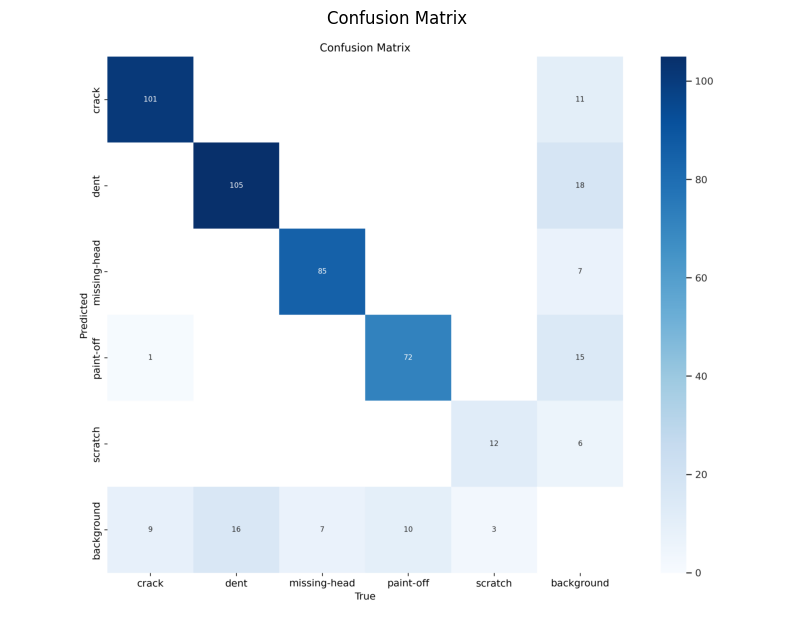

Overall F1 Score: 0.876

Per-Class F1 Scores:
crack: F1 Score = 0.916
dent: F1 Score = 0.840
missing-head: F1 Score = 0.938
paint-off: F1 Score = 0.863
scratch: F1 Score = 0.820


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# --- Display Confusion Matrix ---
# Path to the training run directory (based on your output: runs/detect/train/)
run_path = 'runs/detect/train'

# Load and display the confusion matrix
confusion_matrix_path = os.path.join(run_path, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    img = Image.open(confusion_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Confusion matrix image not found at:", confusion_matrix_path)

# --- Calculate F1 Score ---
# From your validation results (runs/detect/train2):
# Overall: Precision = 0.905, Recall = 0.848
# Per-class:
# crack: Precision = 0.952, Recall = 0.883
# dent: Precision = 0.892, Recall = 0.793
# missing-head: Precision = 0.953, Recall = 0.924
# paint-off: Precision = 0.886, Recall = 0.841
# scratch: Precision = 0.841, Recall = 0.800

# Function to calculate F1 score: F1 = 2 * (precision * recall) / (precision + recall)
def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Overall F1 score
overall_precision = 0.905
overall_recall = 0.848
overall_f1 = calculate_f1_score(overall_precision, overall_recall)
print(f"Overall F1 Score: {overall_f1:.3f}")

# Per-class F1 scores
per_class_metrics = {
    "crack": {"precision": 0.952, "recall": 0.883},
    "dent": {"precision": 0.892, "recall": 0.793},
    "missing-head": {"precision": 0.953, "recall": 0.924},
    "paint-off": {"precision": 0.886, "recall": 0.841},
    "scratch": {"precision": 0.841, "recall": 0.800}
}

print("\nPer-Class F1 Scores:")
for class_name, metrics in per_class_metrics.items():
    f1 = calculate_f1_score(metrics["precision"], metrics["recall"])
    print(f"{class_name}: F1 Score = {f1:.3f}")

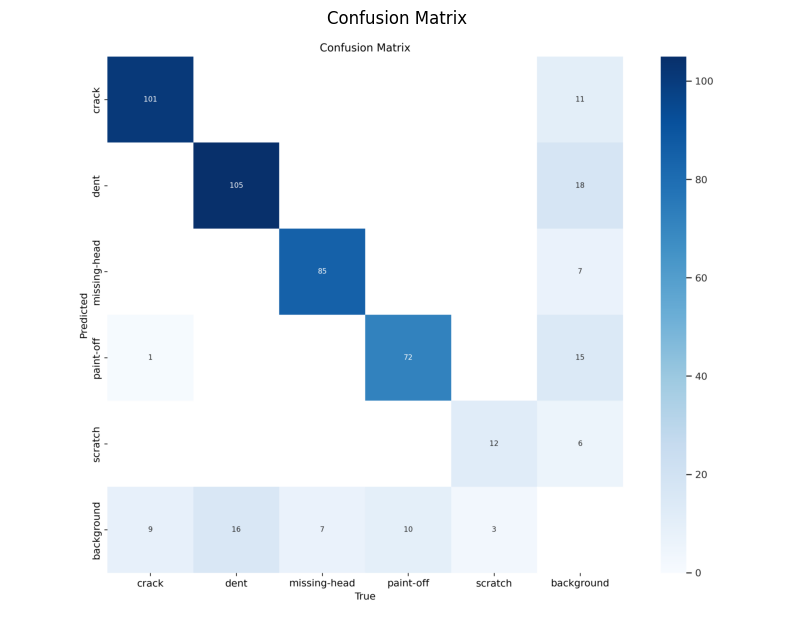

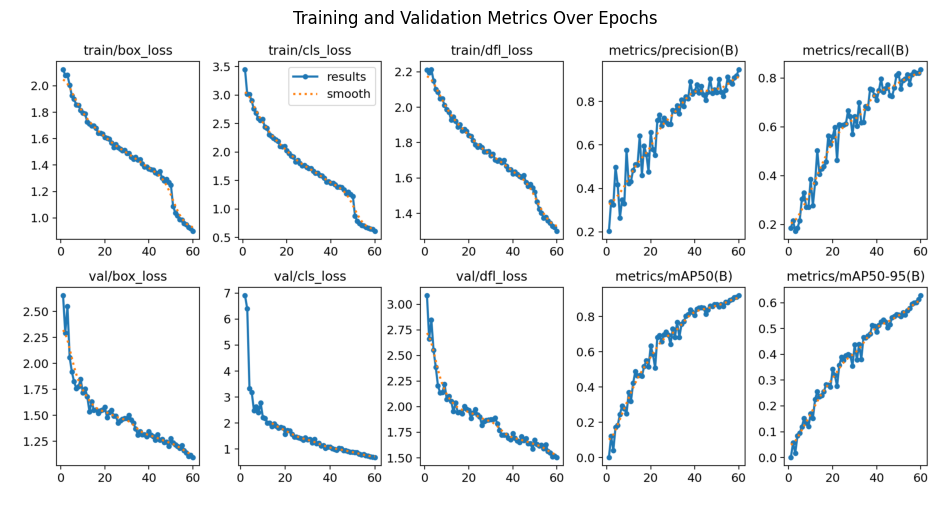

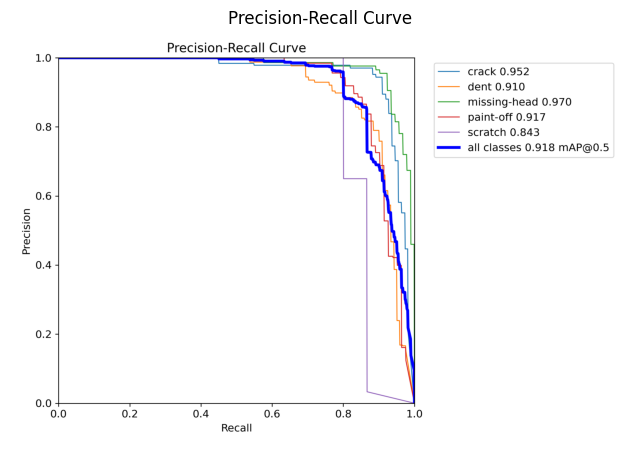

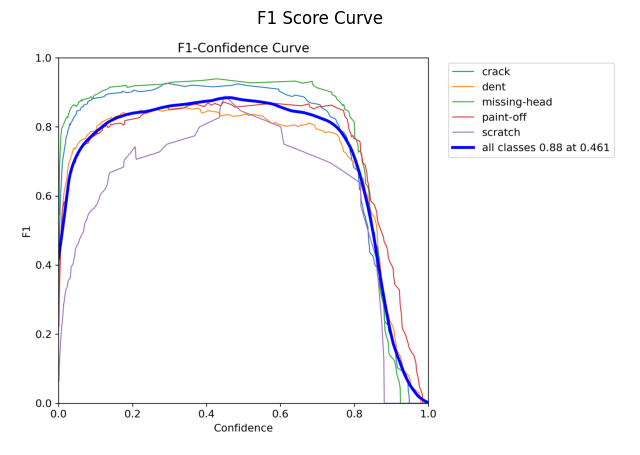

KeyError: 'metrics/precision'

<Figure size 1000x600 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import pandas as pd

# Path to the training run directory (based on your output: runs/detect/train/)
run_path = 'runs/detect/train'

# --- Display Confusion Matrix ---
confusion_matrix_path = os.path.join(run_path, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    img = Image.open(confusion_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Confusion matrix image not found at:", confusion_matrix_path)

# --- Display Training and Validation Metrics (results.png) ---
results_path = os.path.join(run_path, 'results.png')
if os.path.exists(results_path):
    img = Image.open(results_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Training and Validation Metrics Over Epochs")
    plt.show()
else:
    print("Results image not found at:", results_path)

# --- Display Precision-Recall Curve (PR_curve.png) ---
pr_curve_path = os.path.join(run_path, 'PR_curve.png')
if os.path.exists(pr_curve_path):
    img = Image.open(pr_curve_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Precision-Recall Curve")
    plt.show()
else:
    print("Precision-Recall curve image not found at:", pr_curve_path)

# --- Display F1 Score Curve (F1_curve.png) ---
f1_curve_path = os.path.join(run_path, 'F1_curve.png')
if os.path.exists(f1_curve_path):
    img = Image.open(f1_curve_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("F1 Score Curve")
    plt.show()
else:
    print("F1 score curve image not found at:", f1_curve_path)

# --- Custom Metrics Plot (Precision, Recall, mAP over Epochs) ---
# Ultralytics saves a results.csv file with metrics per epoch
results_csv_path = os.path.join(run_path, 'results.csv')
if os.path.exists(results_csv_path):
    # Load the results.csv file
    df = pd.read_csv(results_csv_path)

    # Strip whitespace from column names
    df.columns = df.columns.str.strip()

    # Plot Precision, Recall, and mAP over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['metrics/precision'], label='Precision', marker='o')
    plt.plot(df['epoch'], df['metrics/recall'], label='Recall', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP@0.5'], label='mAP@0.5', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP@0.5:0.95'], label='mAP@0.5:0.95', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.title('Precision, Recall, and mAP over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Results CSV file not found at:", results_csv_path)

# --- Calculate F1 Score ---
# From your validation results (runs/detect/train2):
# Overall: Precision = 0.905, Recall = 0.848
# Per-class:
# crack: Precision = 0.952, Recall = 0.883
# dent: Precision = 0.892, Recall = 0.793
# missing-head: Precision = 0.953, Recall = 0.924
# paint-off: Precision = 0.886, Recall = 0.841
# scratch: Precision = 0.841, Recall = 0.800

# Function to calculate F1 score: F1 = 2 * (precision * recall) / (precision + recall)
def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Overall F1 score
overall_precision = 0.905
overall_recall = 0.848
overall_f1 = calculate_f1_score(overall_precision, overall_recall)
print(f"Overall F1 Score: {overall_f1:.3f}")

# Per-class F1 scores
per_class_metrics = {
    "crack": {"precision": 0.952, "recall": 0.883},
    "dent": {"precision": 0.892, "recall": 0.793},
    "missing-head": {"precision": 0.953, "recall": 0.924},
    "paint-off": {"precision": 0.886, "recall": 0.841},
    "scratch": {"precision": 0.841, "recall": 0.800}
}

print("\nPer-Class F1 Scores:")
for class_name, metrics in per_class_metrics.items():
    f1 = calculate_f1_score(metrics["precision"], metrics["recall"])
    print(f"{class_name}: F1 Score = {f1:.3f}")

In [11]:
from ultralytics import YOLO
import numpy as np

# Load the trained model (using the best weights from your training)
model = YOLO('runs/detect/train/weights/best.pt')

# Run validation to get the metrics object
metrics = model.val()

# Get the confusion matrix (numerical values)
confusion_matrix = metrics.confusion_matrix.matrix

# Get the class names (from your dataset)
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']

# Print the confusion matrix with labels
print("\nConfusion Matrix (True Labels as Rows, Predicted Labels as Columns):")
print("Rows (True Labels):", class_names)
print("Columns (Predicted Labels):", class_names)
print("\n", confusion_matrix)

# Optional: Pretty-print the matrix with formatting
print("\nPretty-Printed Confusion Matrix:")
header = "True\\Pred | " + " | ".join([f"{name:<12}" for name in class_names])
print(header)
print("-" * len(header))
for i, row in enumerate(confusion_matrix):
    row_str = f"{class_names[i]:<9} | " + " | ".join([f"{int(val):<12}" for val in row])
    print(row_str)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]


                   all        290        421      0.905      0.848      0.913      0.627
                 crack         98        111      0.952      0.883      0.952       0.65
                  dent         90        121      0.892      0.793       0.91      0.614
          missing-head         52         92      0.953      0.924       0.97      0.668
             paint-off         67         82      0.886      0.841      0.917      0.682
               scratch         12         15      0.841        0.8      0.818       0.52
Speed: 0.3ms preprocess, 38.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val

Confusion Matrix (True Labels as Rows, Predicted Labels as Columns):
Rows (True Labels): ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']
Columns (Predicted Labels): ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']

 [[        101           0           0           0           0          10]
 [          0         105           0  

IndexError: list index out of range

In [12]:
import numpy as np

# Confusion matrix from your output
confusion_matrix = np.array([
    [101,   0,   0,   0,   0,  10],
    [  0, 105,   0,   0,   0,  17],
    [  0,   0,  85,   0,   0,   7],
    [  1,   0,   0,  72,   0,  15],
    [  0,   0,   0,   0,  12,   6],
    [  9,  16,   7,  10,   3,   0]
])

# Updated class names to include background
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch', 'background']

# Print the confusion matrix with labels
print("\nConfusion Matrix (True Labels as Rows, Predicted Labels as Columns):")
print("Rows (True Labels):", class_names)
print("Columns (Predicted Labels):", class_names)
print("\n", confusion_matrix)

# Pretty-print the matrix with formatting
print("\nPretty-Printed Confusion Matrix:")
header = "True\\Pred | " + " | ".join([f"{name:<12}" for name in class_names])
print(header)
print("-" * len(header))
for i, row in enumerate(confusion_matrix):
    row_str = f"{class_names[i]:<9} | " + " | ".join([f"{int(val):<12}" for val in row])
    print(row_str)


Confusion Matrix (True Labels as Rows, Predicted Labels as Columns):
Rows (True Labels): ['crack', 'dent', 'missing-head', 'paint-off', 'scratch', 'background']
Columns (Predicted Labels): ['crack', 'dent', 'missing-head', 'paint-off', 'scratch', 'background']

 [[101   0   0   0   0  10]
 [  0 105   0   0   0  17]
 [  0   0  85   0   0   7]
 [  1   0   0  72   0  15]
 [  0   0   0   0  12   6]
 [  9  16   7  10   3   0]]

Pretty-Printed Confusion Matrix:
True\Pred | crack        | dent         | missing-head | paint-off    | scratch      | background  
---------------------------------------------------------------------------------------------------
crack     | 101          | 0            | 0            | 0            | 0            | 10          
dent      | 0            | 105          | 0            | 0            | 0            | 17          
missing-head | 0            | 0            | 85           | 0            | 0            | 7           
paint-off | 1            | 0        

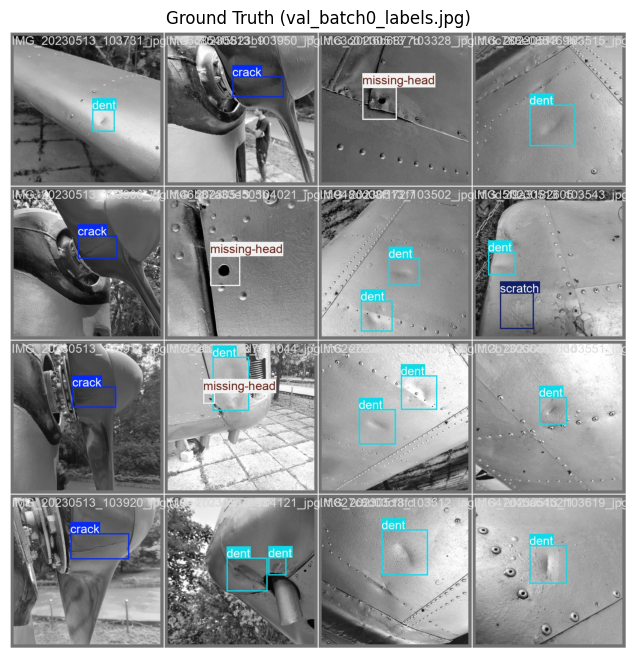

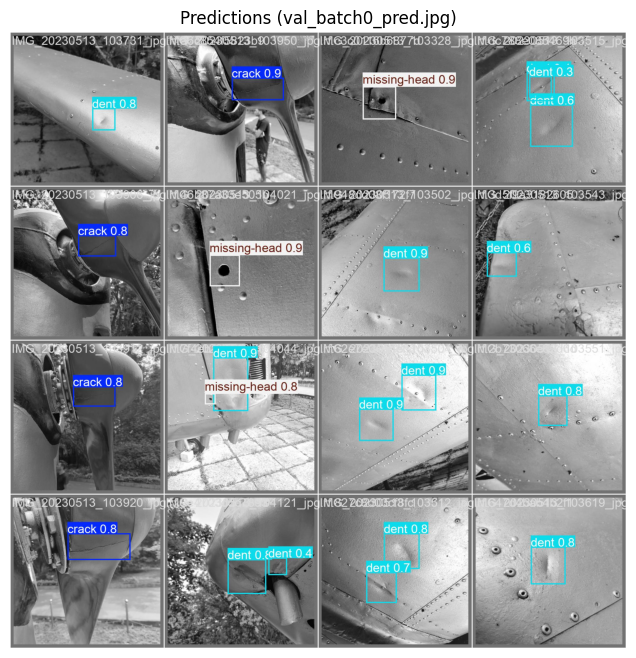

In [13]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the validation run directory (based on your output: runs/detect/val/)
val_run_path = 'runs/detect/val'

# Display val_batch0_labels.jpg (ground truth)
labels_image_path = os.path.join(val_run_path, 'val_batch0_labels.jpg')
if os.path.exists(labels_image_path):
    img = Image.open(labels_image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Ground Truth (val_batch0_labels.jpg)")
    plt.show()
else:
    print("Ground truth image not found at:", labels_image_path)

# Display val_batch0_pred.jpg (predictions)
pred_image_path = os.path.join(val_run_path, 'val_batch0_pred.jpg')
if os.path.exists(pred_image_path):
    img = Image.open(pred_image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predictions (val_batch0_pred.jpg)")
    plt.show()
else:
    print("Predictions image not found at:", pred_image_path)

In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the trained model (using the best weights from your training)
model = YOLO('runs/detect/train/weights/best.pt')

# Run inference on the test set
# This will generate images with predicted bounding boxes in runs/detect/exp/
results = model.predict(
    source='/content/aircraft-skin-defects-new-dataset-1/test/images',  # Path to test images
    save=True,  # Save the images with predictions
    conf=0.461  # Confidence threshold that maximizes F1 score (from your F1-Confidence Curve)
)

# Find the latest prediction run directory (e.g., runs/detect/exp/)
pred_run_dir = max([d for d in os.listdir('runs/detect') if d.startswith('exp')], key=lambda x: os.path.getctime(os.path.join('runs/detect', x)))
pred_run_path = os.path.join('runs/detect', pred_run_dir)

# Display a few sample prediction images
image_files = [f for f in os.listdir(pred_run_path) if f.endswith('.jpg')]
for i, image_file in enumerate(image_files[:5]):  # Display up to 5 images
    img_path = os.path.join(pred_run_path, image_file)
    img = Image.open(img_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Test Image Detection {i+1}: {image_file}")
    plt.show()


image 1/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095703_jpg.rf.5edac33c8d5606f78680a31111801b34.jpg: 640x640 2 paint-offs, 54.1ms
image 2/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095716_jpg.rf.5cd34157f8784d34c06973179b03302e.jpg: 640x640 1 paint-off, 50.9ms
image 3/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095951_jpg.rf.843a62ddbd61effb298894fb4d9f6fc3.jpg: 640x640 (no detections), 47.6ms
image 4/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100042_jpg.rf.66a0160bcec2732b46daee595d1b31a7.jpg: 640x640 2 paint-offs, 45.9ms
image 5/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100132_jpg.rf.10d082c5ec57e94dca78d0591fb2b227.jpg: 640x640 1 paint-off, 44.3ms
image 6/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100531_jpg.rf.eb805a1383dc8b6a5520a09b41f44498.jpg: 640x640 2 missing-heads, 59.5ms
image 7/290 /cont

ValueError: max() arg is an empty sequence

In [15]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Find the latest prediction run directory (e.g., runs/detect/exp/)
pred_run_dir = max([d for d in os.listdir('runs/detect') if d.startswith('exp')], key=lambda x: os.path.getctime(os.path.join('runs/detect', x)))
pred_run_path = os.path.join('runs/detect', pred_run_dir)

# Get a list of all .jpg files in the prediction directory
image_files = [f for f in os.listdir(pred_run_path) if f.endswith('.jpg')]

# Display up to 5 sample prediction images
for i, image_file in enumerate(image_files[:5]):  # Display up to 5 images
    img_path = os.path.join(pred_run_path, image_file)
    img = Image.open(img_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Test Image Detection {i+1}: {image_file}")
    plt.show()

ValueError: max() arg is an empty sequence

In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the trained model (using the best weights from your training)
model = YOLO('runs/detect/train/weights/best.pt')

# Run inference on the test set to generate detection images
# This will create a new directory like runs/detect/exp/
results = model.predict(
    source='/content/aircraft-skin-defects-new-dataset-1/test/images',  # Path to test images
    save=True,  # Save the images with predictions
    conf=0.461  # Confidence threshold that maximizes F1 score (from your F1-Confidence Curve)
)

# Find the latest prediction run directory (e.g., runs/detect/exp/)
try:
    pred_run_dir = max([d for d in os.listdir('runs/detect') if d.startswith('exp')], key=lambda x: os.path.getctime(os.path.join('runs/detect', x)))
    pred_run_path = os.path.join('runs/detect', pred_run_dir)
except ValueError:
    print("Error: No prediction directory found in 'runs/detect/'. Please ensure inference was run successfully.")
    pred_run_path = None

# Display the detection images if the directory exists
if pred_run_path and os.path.exists(pred_run_path):
    # Get a list of all .jpg files in the prediction directory
    image_files = [f for f in os.listdir(pred_run_path) if f.endswith('.jpg')]

    if not image_files:
        print("No detection images found in:", pred_run_path)
    else:
        # Display up to 5 sample prediction images
        for i, image_file in enumerate(image_files[:5]):  # Display up to 5 images
            img_path = os.path.join(pred_run_path, image_file)
            img = Image.open(img_path)
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Test Image Detection {i+1}: {image_file}")
            plt.show()
else:
    print("Cannot display images because the prediction directory was not found.")


image 1/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095703_jpg.rf.5edac33c8d5606f78680a31111801b34.jpg: 640x640 2 paint-offs, 47.8ms
image 2/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095716_jpg.rf.5cd34157f8784d34c06973179b03302e.jpg: 640x640 1 paint-off, 42.6ms
image 3/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_095951_jpg.rf.843a62ddbd61effb298894fb4d9f6fc3.jpg: 640x640 (no detections), 42.8ms
image 4/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100042_jpg.rf.66a0160bcec2732b46daee595d1b31a7.jpg: 640x640 2 paint-offs, 42.6ms
image 5/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100132_jpg.rf.10d082c5ec57e94dca78d0591fb2b227.jpg: 640x640 1 paint-off, 37.5ms
image 6/290 /content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100531_jpg.rf.eb805a1383dc8b6a5520a09b41f44498.jpg: 640x640 2 missing-heads, 29.9ms
image 7/290 /cont

Found prediction directory: runs/detect/predict2


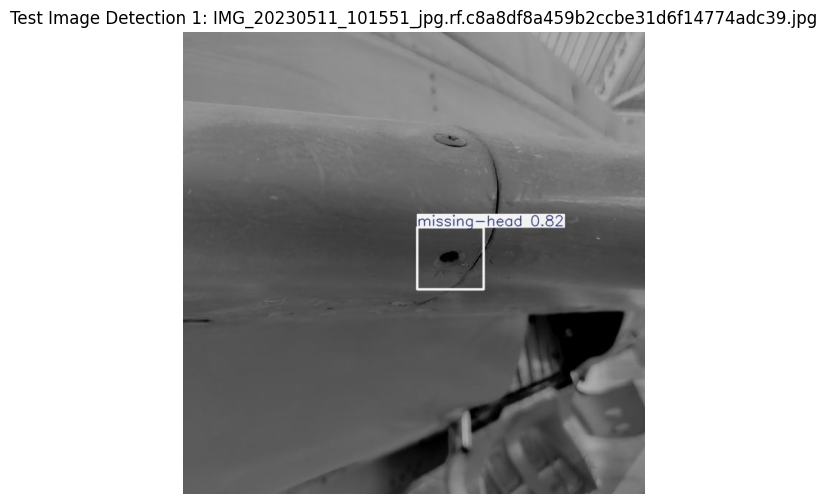

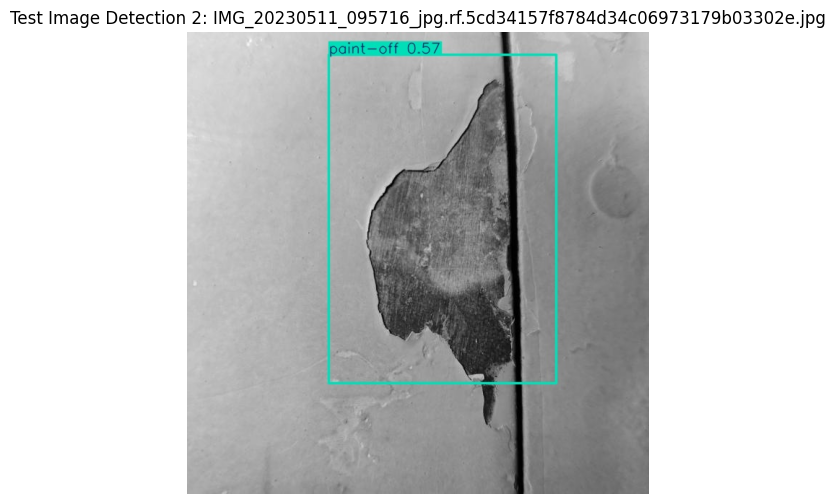

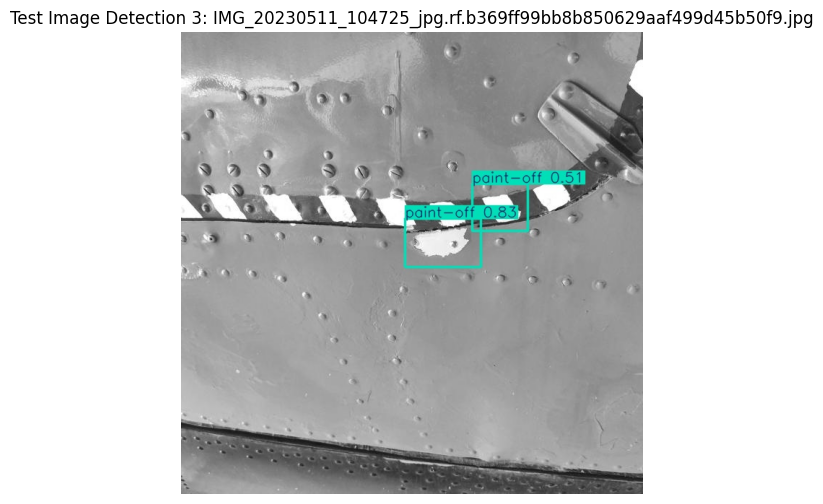

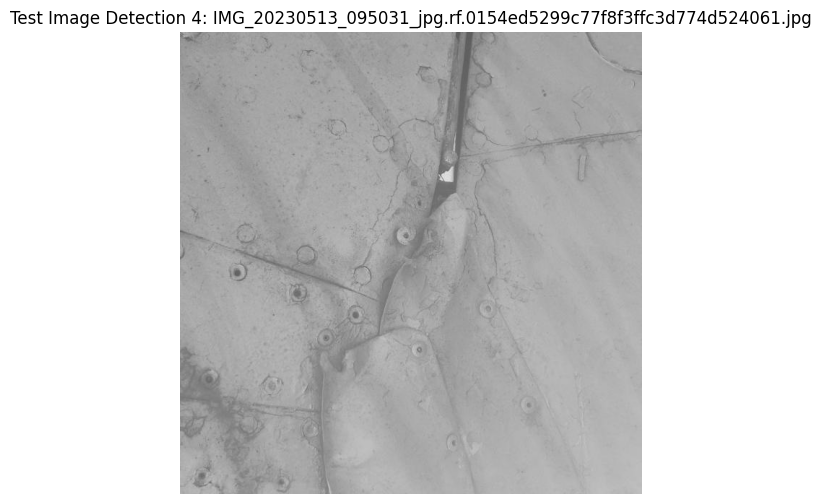

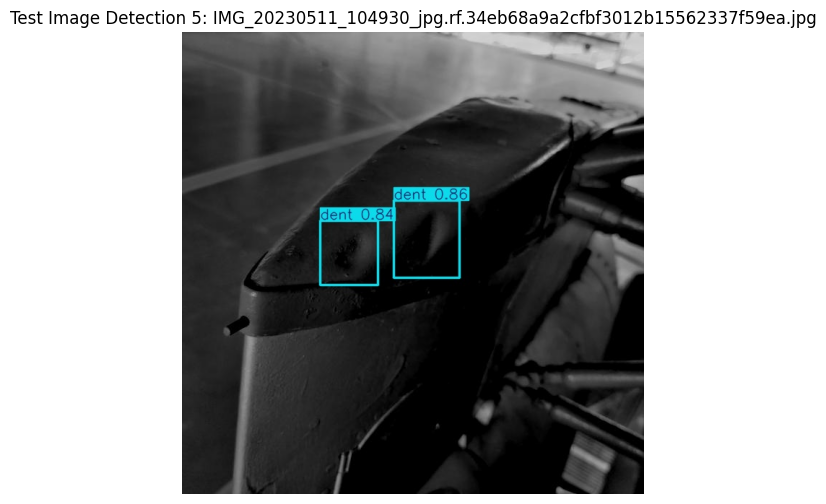

In [17]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Find the latest prediction run directory (e.g., runs/detect/predict2/)
try:
    pred_run_dir = max([d for d in os.listdir('runs/detect') if d.startswith('predict')], key=lambda x: os.path.getctime(os.path.join('runs/detect', x)))
    pred_run_path = os.path.join('runs/detect', pred_run_dir)
    print(f"Found prediction directory: {pred_run_path}")
except ValueError:
    print("Error: No prediction directory found in 'runs/detect/'. Please ensure inference was run successfully.")
    pred_run_path = None

# Display the detection images if the directory exists
if pred_run_path and os.path.exists(pred_run_path):
    # Get a list of all .jpg files in the prediction directory
    image_files = [f for f in os.listdir(pred_run_path) if f.endswith('.jpg')]

    if not image_files:
        print("No detection images found in:", pred_run_path)
    else:
        # Display up to 5 sample prediction images
        for i, image_file in enumerate(image_files[:5]):  # Display up to 5 images
            img_path = os.path.join(pred_run_path, image_file)
            img = Image.open(img_path)
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Test Image Detection {i+1}: {image_file}")
            plt.show()
else:
    print("Cannot display images because the prediction directory was not found.")


0: 640x640 2 paint-offs, 36.1ms
1: 640x640 1 paint-off, 36.1ms
2: 640x640 (no detections), 36.1ms
3: 640x640 2 paint-offs, 36.1ms
4: 640x640 1 paint-off, 36.1ms
5: 640x640 2 missing-heads, 36.1ms
6: 640x640 14 missing-heads, 36.1ms
7: 640x640 (no detections), 36.1ms
8: 640x640 1 paint-off, 36.1ms
9: 640x640 1 missing-head, 36.1ms
10: 640x640 1 crack, 36.1ms
11: 640x640 1 crack, 36.1ms
Speed: 3.3ms preprocess, 36.1ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3

Detection Results for the First 12 Test Images:

Image 1: IMG_20230511_095703_jpg.rf.5edac33c8d5606f78680a31111801b34.jpg
  Class: paint-off, Confidence: 0.957, Bounding Box (x_min, y_min, x_max, y_max): [     110.44      144.78       493.1       495.3]
  Class: paint-off, Confidence: 0.561, Bounding Box (x_min, y_min, x_max, y_max): [     121.52      141.95      349.08      488.66]

Image 2: IMG_20230511_095716_jpg.rf.5cd34157f8784d34c06973179b03302e.jpg
  Class: paint-

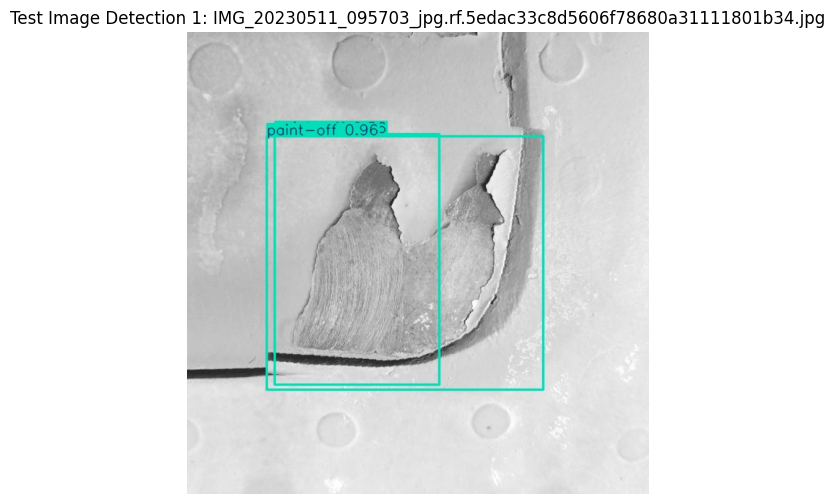

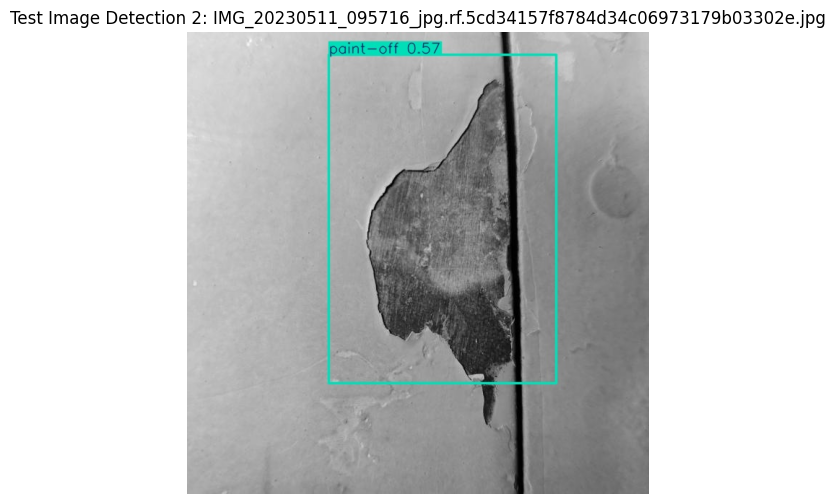

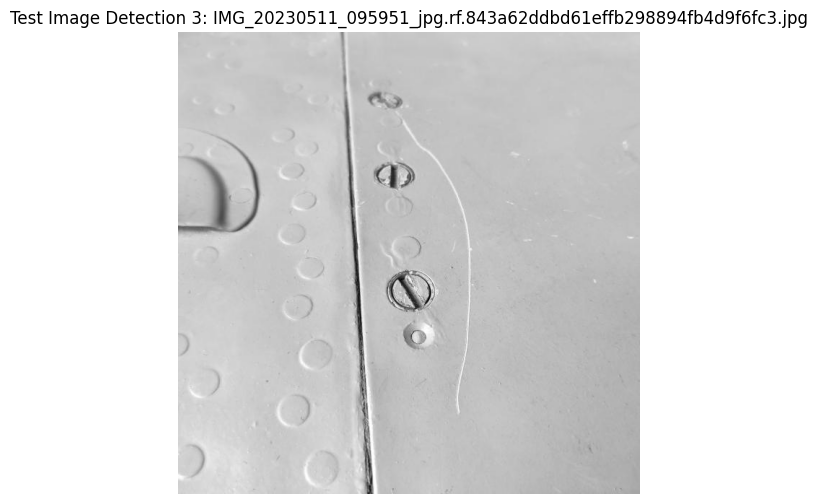

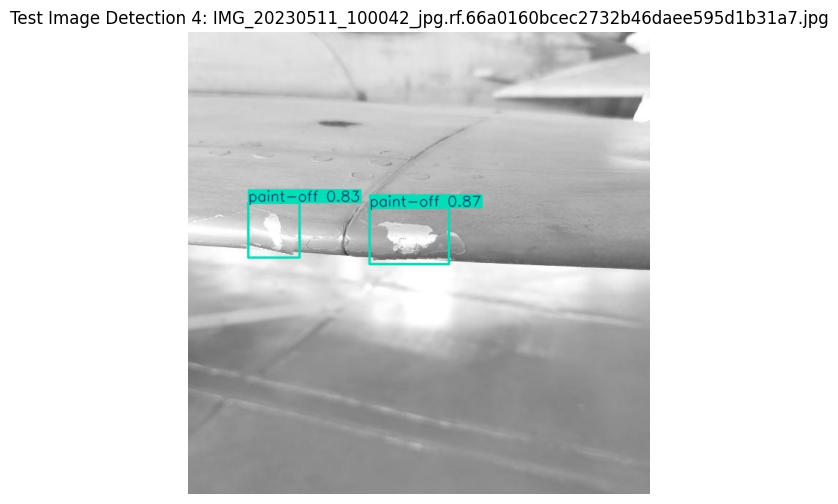

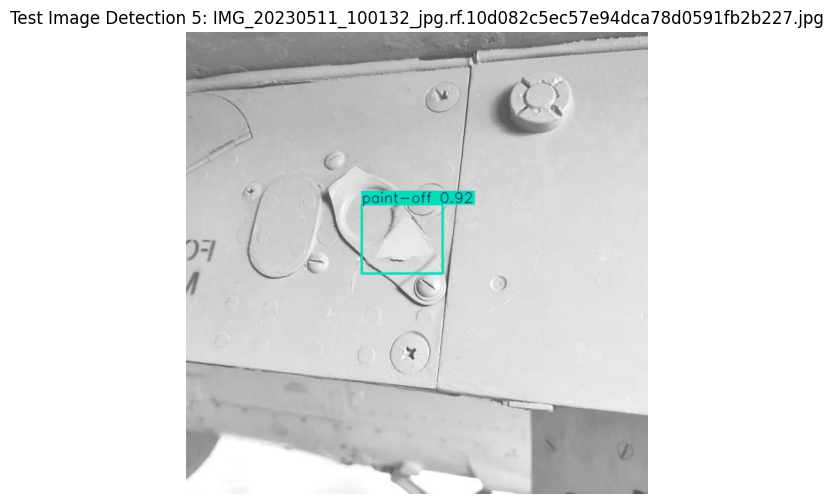

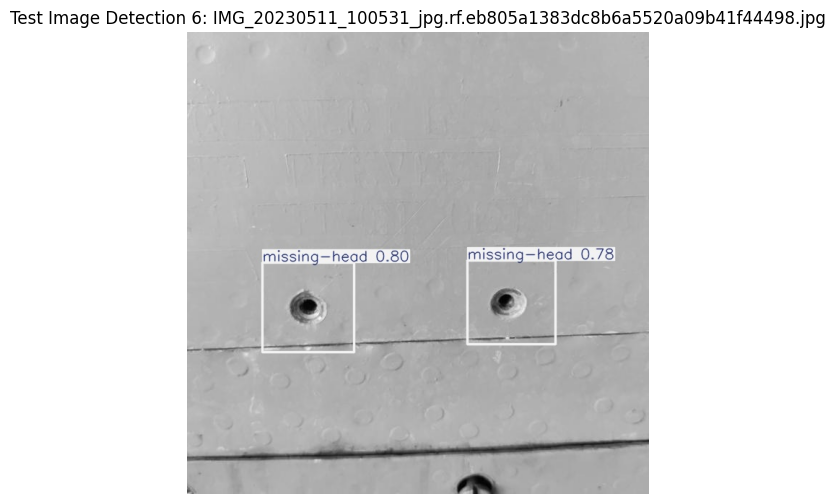

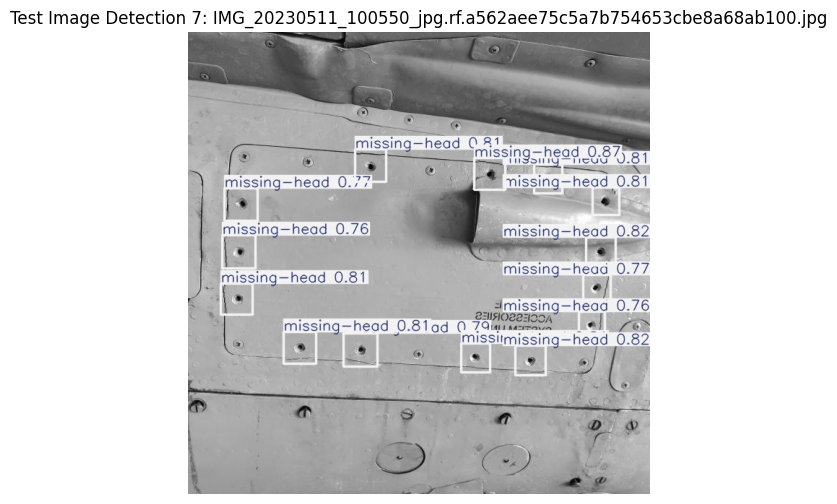

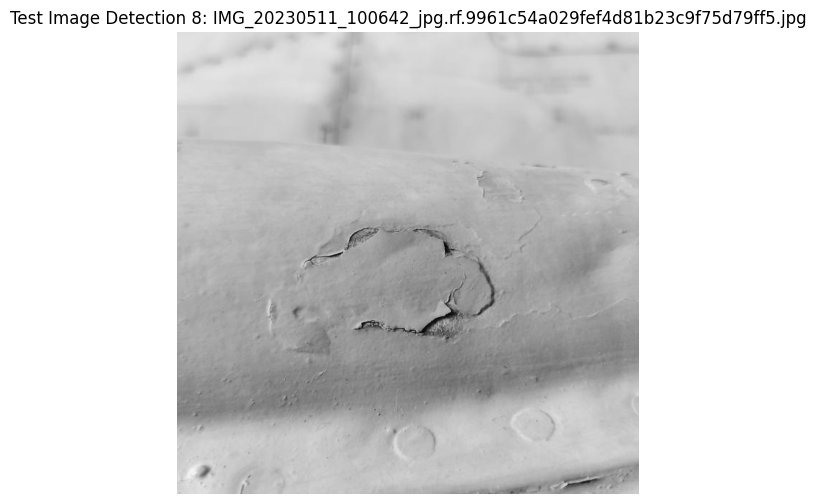

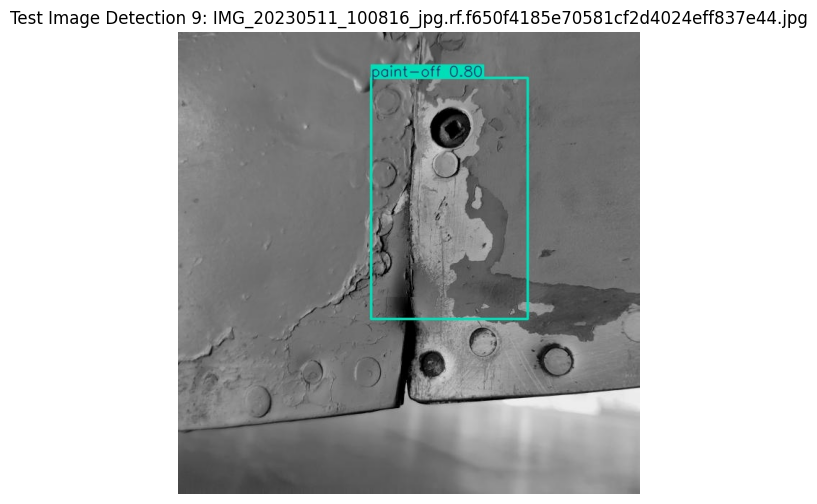

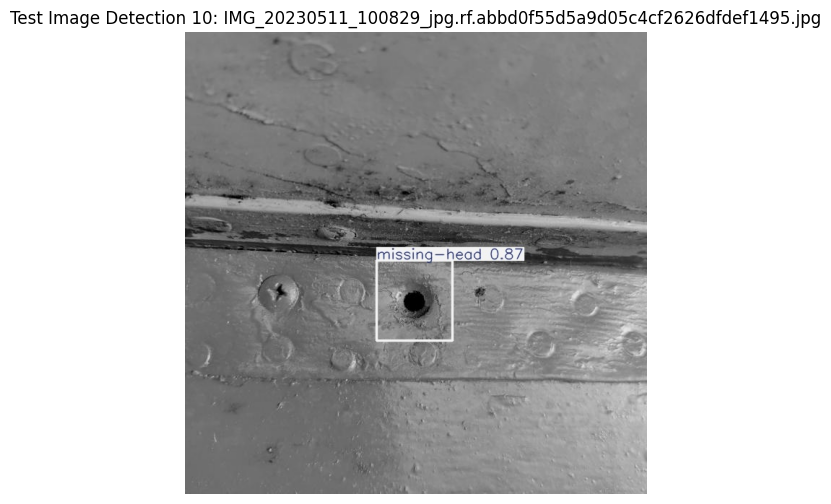

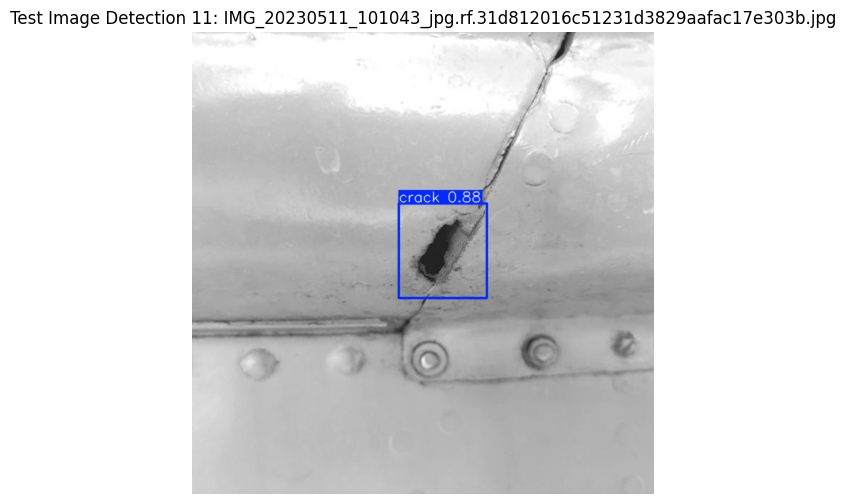

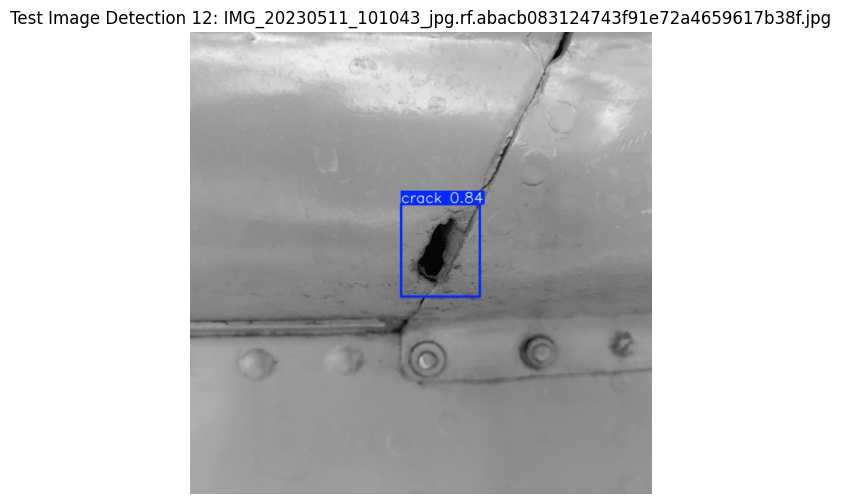

In [18]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the trained model (using the best weights from your training)
model = YOLO('runs/detect/train/weights/best.pt')

# Get the list of test images
test_images_path = '/content/aircraft-skin-defects-new-dataset-1/test/images'
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))])

# Run inference on the test set (first 12 images)
# We need the full path to each image for model.predict()
test_image_paths = [os.path.join(test_images_path, img_file) for img_file in test_image_files[:12]]
results = model.predict(
    source=test_image_paths,  # List of paths to the first 12 test images
    save=True,  # Save the images with predictions
    conf=0.461  # Confidence threshold that maximizes F1 score (from your F1-Confidence Curve)
)

# Print the detection results for the first 12 images
print("\nDetection Results for the First 12 Test Images:")
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']  # Class names from your dataset
for i, result in enumerate(results):
    print(f"\nImage {i+1}: {test_image_files[i]}")
    if result.boxes is None or len(result.boxes) == 0:
        print("  No detections.")
    else:
        for box in result.boxes:
            # Extract bounding box coordinates, class, and confidence
            xyxy = box.xyxy[0].cpu().numpy()  # [x_min, y_min, x_max, y_max]
            class_id = int(box.cls[0].cpu().numpy())  # Class ID
            confidence = box.conf[0].cpu().numpy()  # Confidence score
            class_name = class_names[class_id]  # Map class ID to class name
            print(f"  Class: {class_name}, Confidence: {confidence:.3f}, Bounding Box (x_min, y_min, x_max, y_max): {xyxy}")

# Find the latest prediction run directory (e.g., runs/detect/predict3/)
try:
    pred_run_dir = max([d for d in os.listdir('runs/detect') if d.startswith('predict')], key=lambda x: os.path.getctime(os.path.join('runs/detect', x)))
    pred_run_path = os.path.join('runs/detect', pred_run_dir)
    print(f"\nFound prediction directory: {pred_run_path}")
except ValueError:
    print("Error: No prediction directory found in 'runs/detect/'. Please ensure inference was run successfully.")
    pred_run_path = None

# Display the detection images if the directory exists
if pred_run_path and os.path.exists(pred_run_path):
    # Get a list of all .jpg files in the prediction directory
    image_files = sorted([f for f in os.listdir(pred_run_path) if f.endswith('.jpg')])

    if not image_files:
        print("No detection images found in:", pred_run_path)
    else:
        # Display the first 12 prediction images
        for i, image_file in enumerate(image_files[:12]):  # Display up to 12 images
            img_path = os.path.join(pred_run_path, image_file)
            img = Image.open(img_path)
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Test Image Detection {i+1}: {image_file}")
            plt.show()
else:
    print("Cannot display images because the prediction directory was not found.")

In [20]:
from ultralytics import YOLO
import numpy as np

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluate on the test set
metrics = model.val(data='/content/aircraft-skin-defects-new-dataset-1/data.yaml', imgsz=640, split='test')

# Print overall test set metrics
print("\nTest Set Metrics:")
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")

# Overall precision and recall (average across classes)
overall_precision = np.mean(metrics.box.p)
overall_recall = np.mean(metrics.box.r)
overall_f1 = np.mean(metrics.box.f1)

print(f"Precision (average): {overall_precision:.3f}")
print(f"Recall (average): {overall_recall:.3f}")
print(f"F1 Score (average): {overall_f1:.3f}")

# Print per-class metrics
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']
print("\nPer-Class Metrics:")
for i, class_name in enumerate(class_names):
    print(f"\nClass: {class_name}")
    print(f"  mAP@0.5: {metrics.box.maps[i]:.3f}")
    print(f"  Precision: {metrics.box.p[i]:.3f}")
    print(f"  Recall: {metrics.box.r[i]:.3f}")
    print(f"  F1 Score: {metrics.box.f1[i]:.3f}")

# Confusion matrix (numerical)
confusion_matrix = metrics.confusion_matrix.matrix
print("\nTest Set Confusion Matrix (True Labels as Rows, Predicted Labels as Columns):")
print("Rows (True Labels):", class_names + ['background'])
print("Columns (Predicted Labels):", class_names + ['background'])
print("\n", confusion_matrix)

# Pretty-print the confusion matrix
print("\nPretty-Printed Test Set Confusion Matrix:")
header = "True\\Pred | " + " | ".join([f"{name:<12}" for name in class_names + ['background']])
print(header)
print("-" * len(header))
for i, row in enumerate(confusion_matrix):
    row_str = f"{(class_names + ['background'])[i]:<9} | " + " | ".join([f"{int(val):<12}" for val in row])
    print(row_str)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/aircraft-skin-defects-new-dataset-1/test/labels.cache... 290 images, 2 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.45it/s]


                   all        290        417      0.905       0.87      0.919      0.638
                 crack         89        105       0.93      0.857       0.94      0.663
                  dent         94        120      0.938      0.888      0.946      0.671
          missing-head         56         89      0.982      0.978      0.993      0.719
             paint-off         58         72      0.853      0.819      0.879       0.64
               scratch         23         31      0.821      0.806      0.839      0.495
Speed: 0.3ms preprocess, 38.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val3

Test Set Metrics:
mAP@0.5: 0.919
mAP@0.5:0.95: 0.638
Precision (average): 0.905
Recall (average): 0.870
F1 Score (average): 0.887

Per-Class Metrics:

Class: crack
  mAP@0.5: 0.663
  Precision: 0.930
  Recall: 0.857
  F1 Score: 0.892

Class: dent
  mAP@0.5: 0.671
  Precision: 0.938
  Recall: 0.888
  F1 Score: 0.912

Class: missing-head
  mAP@0.5:

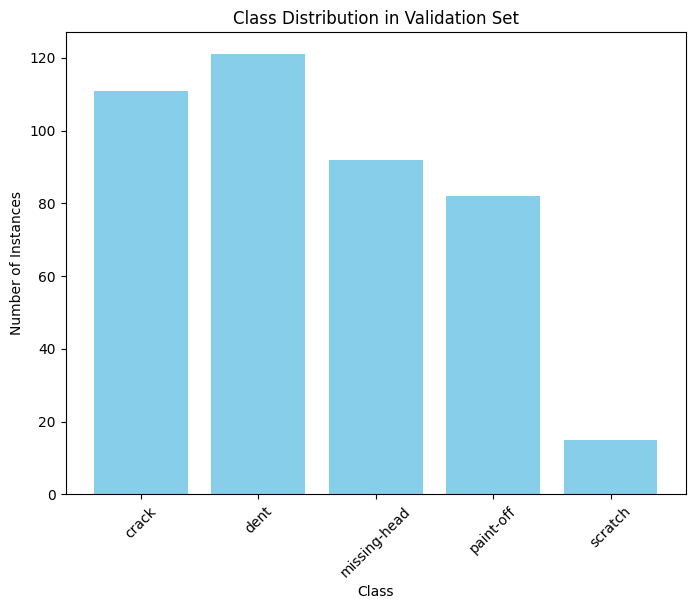

In [21]:
import matplotlib.pyplot as plt

# Class instance counts from your validation output
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']
instance_counts = [111, 121, 92, 82, 15]  # From validation set

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_names, instance_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Validation Set')
plt.xticks(rotation=45)
plt.show()

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:15<00:00,  1.26it/s]


                   all        290        421      0.905      0.848      0.916      0.655
                 crack         98        111      0.952      0.883      0.949      0.681
                  dent         90        121      0.892      0.793      0.913      0.645
          missing-head         52         92      0.953      0.924      0.955      0.685
             paint-off         67         82      0.886      0.841      0.921      0.713
               scratch         12         15      0.841        0.8      0.845       0.55
Speed: 0.3ms preprocess, 39.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val4
Confidence: 0.1, mAP@0.5: 0.916
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.46it/s]


                   all        290        421      0.905      0.848      0.908      0.658
                 crack         98        111      0.952      0.883      0.937      0.679
                  dent         90        121      0.892      0.793      0.892      0.646
          missing-head         52         92      0.953      0.924      0.952      0.688
             paint-off         67         82      0.886      0.841      0.912      0.716
               scratch         12         15      0.841        0.8      0.849      0.562
Speed: 0.4ms preprocess, 37.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val5
Confidence: 0.3, mAP@0.5: 0.908
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]


                   all        290        421      0.929       0.81      0.889      0.655
                 crack         98        111      0.961      0.883       0.93      0.677
                  dent         90        121      0.903      0.769      0.866      0.635
          missing-head         52         92      0.955      0.913      0.948      0.687
             paint-off         67         82      0.918      0.817      0.896       0.71
               scratch         12         15      0.909      0.667      0.806      0.569
Speed: 0.3ms preprocess, 35.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val6
Confidence: 0.461, mAP@0.5: 0.889
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]


                   all        290        421      0.942      0.767       0.87      0.646
                 crack         98        111      0.969      0.838      0.908      0.664
                  dent         90        121      0.934      0.702      0.839      0.627
          missing-head         52         92      0.965      0.902      0.943      0.685
             paint-off         67         82      0.942      0.793      0.887      0.705
               scratch         12         15        0.9        0.6      0.774      0.552
Speed: 0.3ms preprocess, 35.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val7
Confidence: 0.6, mAP@0.5: 0.870
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/aircraft-skin-defects-new-dataset-1/valid/labels.cache... 290 images, 1 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]


                   all        290        421      0.993      0.562      0.779      0.607
                 crack         98        111      0.983      0.514      0.752       0.59
                  dent         90        121          1      0.537      0.769      0.603
          missing-head         52         92      0.984      0.685      0.838      0.622
             paint-off         67         82          1       0.61      0.805      0.675
               scratch         12         15          1      0.467      0.733      0.544
Speed: 0.3ms preprocess, 36.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val8
Confidence: 0.8, mAP@0.5: 0.779


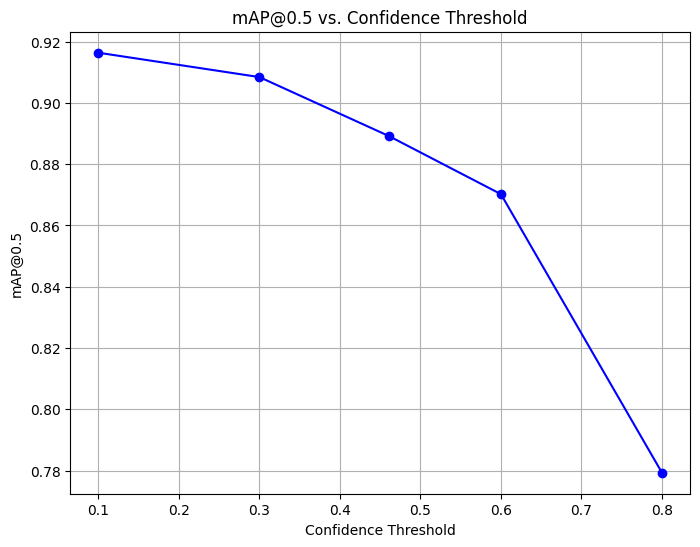

In [22]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluate on validation set with different confidence thresholds
conf_thresholds = [0.1, 0.3, 0.461, 0.6, 0.8]
mAPs = []
for conf in conf_thresholds:
    metrics = model.val(data='/content/aircraft-skin-defects-new-dataset-1/data.yaml', imgsz=640, split='val', conf=conf)
    mAPs.append(metrics.box.map50)
    print(f"Confidence: {conf}, mAP@0.5: {metrics.box.map50:.3f}")

# Plot mAP vs. confidence threshold
plt.figure(figsize=(8, 6))
plt.plot(conf_thresholds, mAPs, marker='o', color='blue')
plt.xlabel('Confidence Threshold')
plt.ylabel('mAP@0.5')
plt.title('mAP@0.5 vs. Confidence Threshold')
plt.grid(True)
plt.show()

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

# Path to the saved prediction image (from runs/detect/predict2)
test_images_path = '/content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100642.jpg.rf.9961c54a029fe4fd81b23c9f75d79ff5.jpg'

print("Missed detection.")

# Display the image
img = Image.open(test_images_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Missed Detection Example")
plt.show()

Missed detection.


FileNotFoundError: [Errno 2] No such file or directory: '/content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100642.jpg.rf.9961c54a029fe4fd81b23c9f75d79ff5.jpg'

In [33]:
import os
print(os.path.exists('/content/aircraft-skin-defects-new-dataset-1/test/images/IMG_20230511_100642.jpg.rf.9961c54a029fe4fd81b23c9f75d79ff5.jpg'))

False


In [34]:
print(os.listdir('/content/aircraft-skin-defects-new-dataset-1/test/images'))

['IMG_20230511_101551_jpg.rf.c8a8df8a459b2ccbe31d6f14774adc39.jpg', 'IMG_20230511_095716_jpg.rf.5cd34157f8784d34c06973179b03302e.jpg', 'IMG_20230511_104725_jpg.rf.b369ff99bb8b850629aaf499d45b50f9.jpg', 'IMG_20230513_095031_jpg.rf.0154ed5299c77f8f3ffc3d774d524061.jpg', 'IMG_20230511_104930_jpg.rf.34eb68a9a2cfbf3012b15562337f59ea.jpg', 'IMG_20230512_121012_jpg.rf.bf42bf1d07cffed5b612499a86d83ddd.jpg', 'IMG_20230513_102355_jpg.rf.5aa3d86c85c02378bbf8429e9d4fbdf4.jpg', 'IMG_20230512_124736_jpg.rf.d5e2101f0b48c2b6632735b07c980c2a.jpg', 'IMG_20230512_124744_jpg.rf.d08b670183d51b8c0ee5c9de6516a5b4.jpg', 'IMG_20230513_095854_jpg.rf.317916152b889795e70f35f2e7072cef.jpg', 'IMG_20230511_102041_jpg.rf.71b0b2126f17ca69fdeaa3fdacd77bba.jpg', 'IMG_20230513_101412_jpg.rf.c826a77d88bd36ef3174f749ee409fc3.jpg', 'IMG_20230511_102729_jpg.rf.feb2d079303285c814eaa8285485f521.jpg', 'IMG_20230512_124717_jpg.rf.f27235cb7e40470d361af2cfcbb2cffe.jpg', 'IMG_20230513_103627_jpg.rf.3b5f3b7b4e3c163e355bed2a3e929988.

In [38]:
from ultralytics import YOLO
import numpy as np

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluate on the test set
metrics = model.val(data='/content/aircraft-skin-defects-new-dataset-1/data.yaml', imgsz=640, split='test')

# Print overall test set metrics
print("\nTest Set Metrics:")
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")

# Overall precision, recall, and F1 (average across classes)
overall_precision = np.mean(metrics.box.p)
overall_recall = np.mean(metrics.box.r)
overall_f1 = np.mean(metrics.box.f1)

print(f"Precision (average): {overall_precision:.3f}")
print(f"Recall (average): {overall_recall:.3f}")
print(f"F1 Score (average): {overall_f1:.3f}")

# Print per-class metrics
class_names = ['crack', 'dent', 'missing-head', 'paint-off', 'scratch']
print("\nPer-Class Metrics:")
for i, class_name in enumerate(class_names):
    print(f"\nClass: {class_name}")
    print(f"  mAP@0.5: {metrics.box.maps[i]:.3f}")
    print(f"  Precision: {metrics.box.p[i]:.3f}")
    print(f"  Recall: {metrics.box.r[i]:.3f}")
    print(f"  F1 Score: {metrics.box.f1[i]:.3f}")

# Confusion matrix (numerical)
confusion_matrix = metrics.confusion_matrix.matrix
print("\nTest Set Confusion Matrix (True Labels as Rows, Predicted Labels as Columns):")
print("Rows (True Labels):", class_names + ['background'])
print("Columns (Predicted Labels):", class_names + ['background'])
print("\n", confusion_matrix)

# Pretty-print the confusion matrix
print("\nPretty-Printed Test Set Confusion Matrix:")
header = "True\\Pred | " + " | ".join([f"{name:<12}" for name in class_names + ['background']])
print(header)
print("-" * len(header))
for i, row in enumerate(confusion_matrix):
    row_str = f"{(class_names + ['background'])[i]:<9} | " + " | ".join([f"{int(val):<12}" for val in row])
    print(row_str)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/aircraft-skin-defects-new-dataset-1/test/labels.cache... 290 images, 2 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.70it/s]


                   all        290        417      0.905       0.87      0.919      0.638
                 crack         89        105       0.93      0.857       0.94      0.663
                  dent         94        120      0.938      0.888      0.946      0.671
          missing-head         56         89      0.982      0.978      0.993      0.719
             paint-off         58         72      0.853      0.819      0.879       0.64
               scratch         23         31      0.821      0.806      0.839      0.495
Speed: 0.3ms preprocess, 30.0ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val9

Test Set Metrics:
mAP@0.5: 0.919
mAP@0.5:0.95: 0.638
Precision (average): 0.905
Recall (average): 0.870
F1 Score (average): 0.887

Per-Class Metrics:

Class: crack
  mAP@0.5: 0.663
  Precision: 0.930
  Recall: 0.857
  F1 Score: 0.892

Class: dent
  mAP@0.5: 0.671
  Precision: 0.938
  Recall: 0.888
  F1 Score: 0.912

Class: missing-head
  mAP@0.5:

In [40]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [41]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

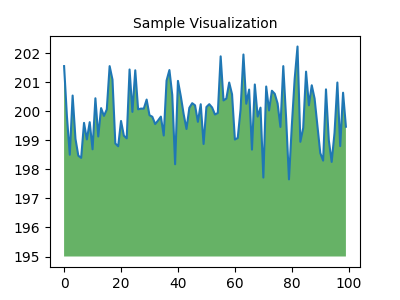

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
